In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

#read csv
df = pd.read_csv('Significant_Earthquakes.csv')

#clean data
df = df.drop({'nst', 'gap', 'dmin', 'rms'}, axis=1)
df = df.dropna(subset = {'mag', 'depth'})

#only using human reviewed data of type earthquake
df = df.loc[df['status'] == 'reviewed']
df = df.loc[df['type'] == 'earthquake']

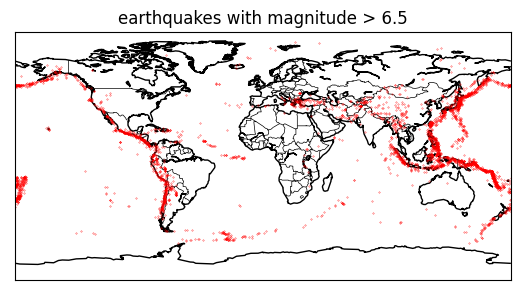

In [19]:
lats = df['latitude']
longs = df['longitude']
mags = df['mag']

#Basemap instance
map = Basemap(projection='cyl', resolution='c')
map.drawcoastlines()
map.drawcountries()

#plot points
for lat, lon, mag in zip(lats, longs, mags):
   
    if (mag > 6.5):
        x, y = map(lon, lat)
        map.plot(x, y, 'r.', markersize=.5)
    
plt.title('earthquakes with magnitude > 6.5')
plt.show()

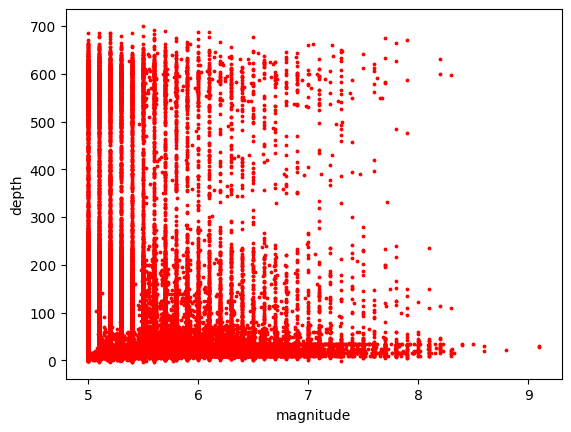

In [28]:
mags = df['mag']
depths = df['depth']

plt.scatter(mags, depths, s=3, c='red')
plt.xlabel("magnitude")
plt.ylabel("depth")

plt.show()

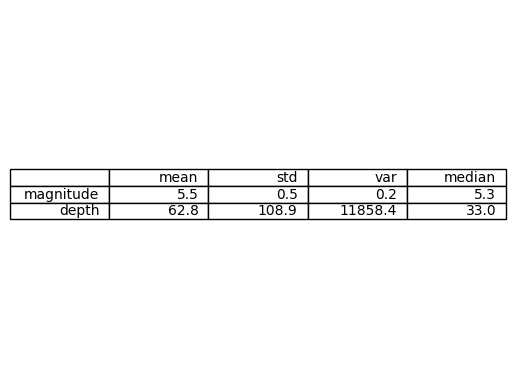

In [137]:
m = np.round(np.array([np.mean(mags), np.std(mags), np.var(mags), np.median(mags)]), decimals=1).astype(str)
d = np.round(np.array([np.mean(depths), np.std(depths), np.var(depths), np.median(depths)]), decimals=1).astype(str)

# create table data
data = [['', 'mean', 'std', 'var', 'median'],
        np.concatenate((['magnitude'], m)),
        np.concatenate((['depth'], d))]

#generate table
fig, ax = plt.subplots()
table = ax.table(cellText=data, loc='center')

table.auto_set_font_size(False)
table.set_fontsize(10)

ax.axis('off')
plt.show()


In [1]:
def convert_to_unix(timestamp):
    return int(pd.to_datetime(timestamp).timestamp())
df['unix-time'] = df['time'].apply(lambda x : convert_to_unix(x))

In [100]:
import datetime

def unix_to_year(unix_timestamp):
    epoch = datetime.datetime(1970, 1, 1)
    dt = epoch + datetime.timedelta(seconds=unix_timestamp)
    return dt.year

print(unix_to_year(1682823201))

2023


Text(0.5, 1.0, 'Earthquakes with magnitude > 6 by year')

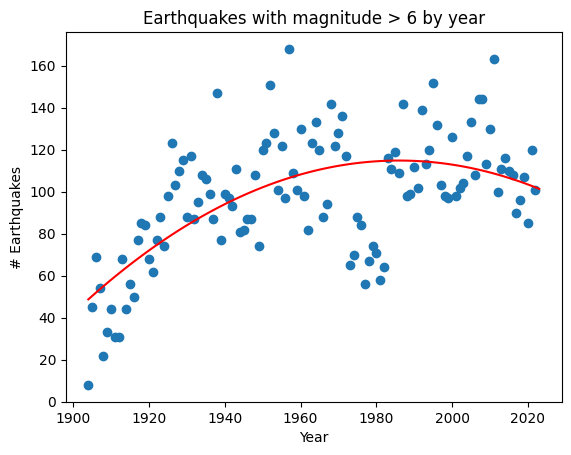

In [136]:
#plot earthuake magnitude over time 
unix_year = 31536000 #seconds in a year
start_year =  -2082844800 #1/1/1904
end_year = 1682823201

years = np.arange(start_year, end_year, unix_year) #unix year bins
readable = np.arange(1904, 2023, 1)

numOver6 = []

n = len(years)
for i in range(0, n-1):
    bin_df = df.loc[(df['unix-time'] > years[i]) & (df['unix-time'] < years[i+1])] #get the df for this bin
    print
    numOver6.append(bin_df.loc[bin_df['mag'] > 6.0].shape[0])


polyReg = np.polyfit(readable, numOver6, 2)

x_new = np.linspace(1904, 2023, 100)
y_new = np.polyval(polyReg, x_new)

plt.plot(x_new, y_new, color='red')

plt.scatter(readable, numOver6)
plt.xlabel('Year')
plt.ylabel('# Earthquakes')
plt.title('Earthquakes with magnitude > 6 by year')
    
#print(df['time'].head(5))

#print(df['unix-time'].head(5))
#df.loc[(df['unix-time'] > start_year + unix_year) & (df['unix-time'] < start_year + unix_year*2)]

